In [1]:
import pandas as pd
import pathlib as pl
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
path = pl.Path(f"./data/21")
dfraw21 = pd.DataFrame()
for file in path.iterdir():
    df = pd.read_csv(path/file.name)
    df=df.dropna(subset=['price'])
    df["price"] = df["price"].apply(lambda x: x.replace("$",""))
    df ["price"] = df ["price"].apply(lambda x: x.replace(",",""))
    df ["price"] = df ["price"].astype (np.float32)
    df ["price"] = df ["price"].astype (np.int32)
    df["month"] = file.name[:3]
    dfraw21 = pd.concat([dfraw21,df])

path = pl.Path(f"./data/23")
dfraw23 = pd.DataFrame()
for file in path.iterdir():
    df = pd.read_csv(path/file.name)
    df=df.dropna(subset=['price'])
    df["price"] = df["price"].apply(lambda x: x.replace("$",""))
    df ["price"] = df ["price"].apply(lambda x: x.replace(",",""))
    df ["price"] = df ["price"].astype (np.float32)
    df ["price"] = df ["price"].astype (np.int32)
    df["month"] = file.name[:3]
    dfraw23 = pd.concat([dfraw23,df])

Mean december 21: 98.3338551225305
Mean december 23: 134.3088930060213
Mean june 21: 106.8745397022976
Mean june 23: 162.64263954632798
Mean march 21: 95.45021207836801
Mean march 23: 127.30795346747216
Mean september 21: 106.12190526040304
Mean september 23: 160.60513160805132


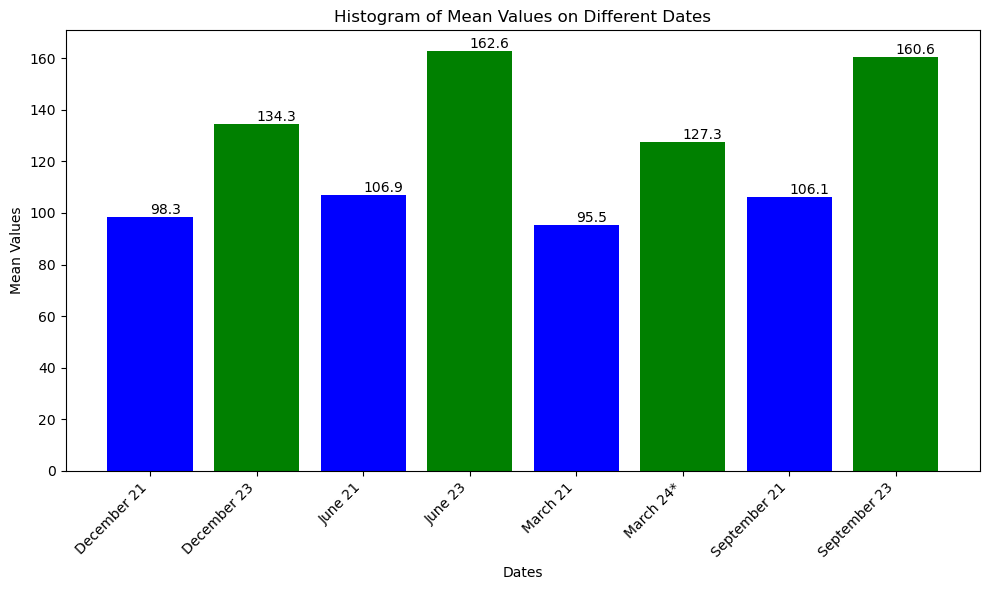

In [4]:
dec21mean = dfraw21[dfraw21["month"] == "dec"]["price"].mean()
jun21mean = dfraw21[dfraw21["month"] == "jun"]["price"].mean()
mar21mean = dfraw21[dfraw21["month"] == "mar"]["price"].mean()
sep21mean = dfraw21[dfraw21["month"] == "sep"]["price"].mean()

dec23mean = dfraw23[dfraw23["month"] == "dec"]["price"].mean()
jun23mean = dfraw23[dfraw23["month"] == "jun"]["price"].mean()
mar23mean = dfraw23[dfraw23["month"] == "mar"]["price"].mean()
sep23mean = dfraw23[dfraw23["month"] == "sep"]["price"].mean()

print("Mean december 21:",dec21mean)
print("Mean december 23:",dec23mean)
print("Mean june 21:",jun21mean)
print("Mean june 23:",jun23mean)
print("Mean march 21:",mar21mean)
print("Mean march 23:",mar23mean)
print("Mean september 21:",sep21mean)
print("Mean september 23:",sep23mean)

data = {
    "December 21": dec21mean,
    "December 23": dec23mean,
    "June 21": jun21mean,
    "June 23": jun23mean,
    "March 21": mar21mean,
    "March 24*": mar23mean,
    "September 21": sep21mean,
    "September 23": sep23mean
}

# Colors for the bars
colors = ['blue' if '21' in date else 'green' for date in data.keys()]

# Create a histogram with different colors for '21 and '23
plt.figure(figsize=(10, 6))
bars = plt.bar(data.keys(), data.values(), color=colors)
plt.xlabel('Dates')
plt.ylabel('Mean Values')
plt.title('Histogram of Mean Values on Different Dates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='bottom')  # va: vertical alignment

plt.tight_layout()

# Display the histogram
plt.show()